In [1]:
import pandas as pd 
import time
import numpy as np


## relabel the hours2sepsis
If the time is 12 hrs before sepsis onset time, we give it mex_hours+1, same as the septic patients

## Some patients gets better after treatment.
For example, p119052


In [3]:
import math
import random
import sys
import time
import pandas as pd
import numpy as np
start = time.time()
 
max_hours = 48  
sepsis_full = pd.read_csv('fully_imputed.csv') # already have hours2sepsis label in it
win_size = 8
hours_before = 24
with open(f'fully_imputed_{win_size}windowed_max{max_hours}_updated.csv', 'a') as f:

    for patient_id in sepsis_full['pat_id'].unique():
            # dding .copy() makes curr_pat_df an independent DataFrame, not a view of sepsis_full
        IsError = False
        curr_pat_df_ori = sepsis_full[sepsis_full['pat_id']==patient_id].copy()
        curr_pat_df_ori.reset_index(drop=True, inplace=True)
        len_stay = len(curr_pat_df_ori)
        
        # add hours2sepsis label
        if curr_pat_df_ori['SepsisLabel'].sum() != 0: # septic patient
            IsSeptic = True
            sepsis_onset_time_ori = curr_pat_df_ori['SepsisLabel'].eq(1).idxmax()
            for i in range(sepsis_onset_time_ori, len(curr_pat_df_ori)):
                if curr_pat_df_ori['SepsisLabel'].iloc[i] == 0:
                    print(f"data error: septic {patient_id} SepsisLabel turned from 1 to 0 at {i}th row")
                    print(f'{patient_id} abandoned!!')
                    IsError = True
                    break

            print(f'IsError: {IsError} ')

            if not IsError:
                hours2sepsis_septic = [0] * len(curr_pat_df_ori)
                for i in range(len(curr_pat_df_ori)):
                    if i < sepsis_onset_time_ori: 
                        if sepsis_onset_time_ori-i > hours_before: # for septic patients, {hours_before}hrs before sepsis onset time is considered the same as a nonseptic patient
                            hours2sepsis_septic[i] = max_hours+1
                        else:
                            
                            hours2sepsis_septic[i] = sepsis_onset_time_ori-i
                    else: 
                        ## Some patients gets better after treatment. For example, p119052, 'SepsisLabel' turned from 1 to 0 at some point.
                        # if curr_pat_df_ori['SepsisLabel'].iloc[i] ==1: # if it's still septic
                            # hours2sepsis_septic[i] = 0
                        # else: # if it's not septic anymore
                        #     hours2sepsis_septic[i] = max_hours+1
                        hours2sepsis_septic[i] = 0
                curr_pat_df_ori['hours2sepsis'] = hours2sepsis_septic 
            else:
                pass    
        else: # non-septic patient
            IsSeptic = False
            curr_pat_df_ori['hours2sepsis'] = [max_hours+1] * len(curr_pat_df_ori)
        
        # splitted into 8 hrs window
        win_id = 0
        if not IsError:
            for start_index in range(0, len_stay, win_size): # create a window every 8 hours
                end_index = start_index + win_size

                if start_index>=end_index:
                    print(f'start index < end_index')
                    print(f'start_index: {start_index}')
                    print(f'end_index: {end_index}')
                    sys.exit()
                curr_pat_df = curr_pat_df_ori.iloc[start_index:end_index]
        
                curr_pat_df.reset_index(drop=True, inplace=True)
                if len(curr_pat_df) != win_size: # if the last window is less than 8 hours, we discard it
                    pass
                else: # else we keep it and give it a new pat_id to separate it from the original patient
                    if IsSeptic:
                        curr_pat_df['pat_id'] = str(patient_id)+f'_win{str(win_id)}_septic'
                    else:
                        curr_pat_df['pat_id'] = str(patient_id)+f'_win{str(win_id)}_nonseptic'
                    curr_pat_df.to_csv(f, header=f.tell() == 0, index=False)
                    win_id += 1
        else:
            pass
        
print(f'@*%$$$$$    time: {time.time()-start}')

/nethome/azhou60/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


IsError: False 
data error: septic p119052 SepsisLabel turned from 1 to 0 at 180th row
p119052 abandoned!!
IsError: True 


/nethome/azhou60/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError: False 
IsError:

In [3]:

import numpy as np
import pandas as pd
import math
        # test_set = np.load('../cpbanditsepsis_experiements//Data/test_set.npy')
        # test_set =  test_set[start_test:start_test+self.num_test_pat]
test_nosepsis = np.load("./test_nosepsis.npy")
test_sepsis = np.load("./test_sepsis.npy")
train_sepsis = np.load('./train_sepsis.npy')
train_nosepsis = np.load('./train_nosepsis.npy')
        # train_sepsis = train_sepsis[start_sepsis_train:start_sepsis_train+self.num_train_sepsis_pat]
        # train_nosepsis = train_nosepsis[start_nosepsis_train:start_nosepsis_train+self.num_train_nosepsis_pat]
        # print(f'test_set:{test_set}')
        # print(f'train_sepsis:{train_sepsis}')
        # print(f'train_nosepsis:{train_nosepsis}')

win_size = 8
        # abandon the 0-1-0 patients and treat as error
sepsis_full = pd.read_csv(f'./fully_imputed_8windowed_max48_updated.csv')
        # preserve the 0-1-0 patients
        # sepsis_full = pd.read_csv(f'../cpbanditsepsis_experiements/Data/fully_imputed_8windowed_max48.csv')

sepsis_train_wins = []
nosepsis_train_wins = []
test_wins = []
test_septic_wins = []
test_noseptic_wins = []
 
        
for patient_winid in sepsis_full['pat_id'].unique():
    if patient_winid.split('_')[0]+'.psv' in train_sepsis:
                # print(patient_winid)
        sepsis_train_wins.append(patient_winid)
    elif patient_winid.split('_')[0]+'.psv' in train_nosepsis:
        nosepsis_train_wins.append(patient_winid)
    elif patient_winid.split('_')[0]+'.psv' in test_nosepsis:
        test_noseptic_wins.append(patient_winid)  
    elif patient_winid.split('_')[0]+'.psv' in test_sepsis:
        test_septic_wins.append(patient_winid)
# test_wins = test_septic_wins + test_noseptic_wins

# np.save("test_wins.npy", test_wins)
np.save("test_septic_wins.npy", test_septic_wins)
np.save("test_noseptic_wins.npy", test_noseptic_wins)
np.save("sepsis_train_wins.npy", sepsis_train_wins)
np.save("nosepsis_train_wins.npy", nosepsis_train_wins)

### Meeting with Rishi notes: 2024Jan12
- reduce the window to 6-8 hours
- we could have sub patient windows in the training set, but ensure that the testing set is on patient level.
- get more septic patients sub windows
- same ratio. septic: nonseptic = 1:1 in training (balanced dataset)
- unbalanced testing dataset (same ratio as the whole cohort)


In [57]:
# get the ratio of the septic and non septic patients for the whole cohort       
id_sepsis  = np.load("id_sepsis.npy")
id_nosepsis  = np.load("id_nosepsis.npy")

In [58]:
print(id_sepsis)

['p110704.psv' 'p119052.psv' 'p103744.psv' ... 'p003204.psv' 'p005885.psv'
 'p006354.psv']


In [59]:
len_sepsis = len(id_sepsis)
len_nosepsis = len(id_nosepsis)
print(f'len(id_sepsis) = {len_sepsis}')
print(f'len(id_nosepsis) = {len_nosepsis}')

len(id_sepsis) = 2918
len(id_nosepsis) = 37201


In [64]:
import math
print(len_sepsis/len_nosepsis)

0.07843875164646112


In [68]:
print(len_nosepsis/len_sepsis)

12.748800548320768


Get the testing set with the same ratio of septic and nonseptic patients

In [65]:
from sklearn.model_selection import train_test_split    

# if we split the testing and the training by this way, we will have the same ratio of the septic and non septic patients for the testing and the training
train_nosepsis, test_nosepsis = train_test_split(id_nosepsis, test_size=0.15, random_state=12306)
train_sepsis, test_sepsis = train_test_split(id_sepsis, test_size=0.15, random_state=12306)
test_set = np.append(test_nosepsis, test_sepsis)
train_set = np.append(train_nosepsis, train_sepsis)
np.save("train_nosepsis.npy", train_nosepsis)
np.save("train_sepsis.npy", train_sepsis)
np.save("test_nosepsis.npy", test_nosepsis)
np.save("test_sepsis.npy", test_sepsis)
np.save("test_set.npy", test_set)
np.save("train_set.npy", train_set)


In [66]:
train_nosepsis = np.load("train_nosepsis.npy")

In [67]:
train_nosepsis

array(['p019696.psv', 'p011600.psv', 'p017355.psv', ..., 'p117887.psv',
       'p015736.psv', 'p015375.psv'], dtype='<U11')

In [20]:
# math.floor(49/8)

Then we need to extract the 8hrs window from different patients, and  make the train set have the same ratio of windows from the septic and non septic patients  

In [22]:
import math
import random
start = time.time()
 
max_hours = 8 # len of the window
# make the ratio of septic and non-septic patients 1:1
sepsis_full_48 = pd.read_csv('fully_imputed.csv') # already have hours2sepsis label in it

with open(f'fully_imputed_balanced_testset_win{max_hours}.csv', 'a') as f:

    for patient_id in sepsis_full_48['pat_id'].unique():
            # dding .copy() makes curr_pat_df an independent DataFrame, not a view of sepsis_full
        curr_pat_df_l = sepsis_full_48[sepsis_full_48['pat_id']==patient_id].copy()
        curr_pat_df_l.reset_index(drop=True, inplace=True)
        len_stay = len(curr_pat_df_l)
        win_id = 0
        for start_index in range(0, len_stay, max_hours): # create a window every 8 hours
            end_index = start_index + max_hours
            curr_pat_df = curr_pat_df_l.iloc[start_index:end_index]
            curr_pat_df.reset_index(drop=True, inplace=True)
            if start_index>=end_index:
                print(f'start index < end_index')
                print(f'start_index: {start_index}')
                print(f'end_index: {end_index}')
                break
            if len(curr_pat_df) != max_hours: # if the last window is less than 8 hours, we discard it
                pass
            else: # else we keep it and give it a new pat_id to separate it from the original patient
                curr_pat_df['pat_id'] = str(patient_id)+f'_win{str(win_id)}'
                curr_pat_df.to_csv(f, header=f.tell() == 0, index=False)
                win_id += 1
print(f'@*%$$$$$    time: {time.time()-start}')

/nethome/azhou60/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


@*%$$$$$    time: 1581.9933307170868


In [39]:
train_sepsis = np.load('train_sepsis.npy')
train_nosepsis = np.load('train_nosepsis.npy')
# print(len(train_nosepsis))
train_sepsis = [str(item) for item in train_sepsis]


In [49]:
print(train_nosepsis)

['p019696.psv' 'p011600.psv' 'p017355.psv' ... 'p117887.psv' 'p015736.psv'
 'p015375.psv']


In [40]:
print(type(train_sepsis[0]))

<class 'str'>


In [28]:
win_size = 8
sepsis_full = pd.read_csv(f'fully_imputed_balanced_testset_win{win_size}.csv') 
sepsis_full.head()

,pat_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Glucose,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,hours2sepsis
0,p119046_win0,84.045029,97.403481,36.708390,124.795742,85.718264,67.642071,18.833348,131.356454,60.0,1,1.0,0.0,-7.79,1.0,0,49
1,p119046_win0,85.000000,98.000000,36.644472,168.000000,123.000000,94.000000,22.000000,98.000000,60.0,1,1.0,0.0,-7.79,2.0,0,49
2,p119046_win0,81.000000,97.500000,36.662368,163.500000,119.000000,90.000000,24.000000,98.000000,60.0,1,1.0,0.0,-7.79,3.0,0,49
3,p119046_win0,83.000000,98.000000,36.500000,158.000000,117.000000,89.000000,22.500000,98.000000,60.0,1,1.0,0.0,-7.79,4.0,0,49
4,p119046_win0,84.000000,97.000000,36.651706,154.000000,113.000000,85.000000,20.000000,98.000000,60.0,1,1.0,0.0,-7.79,5.0,0,49


In [45]:
print(sepsis_full['pat_id'].unique())
print(type(sepsis_full['pat_id'].unique()))


['p119046_win0' 'p119046_win1' 'p119046_win2' ... 'p006432_win5'
 'p009701_win0' 'p009701_win1']
<class 'numpy.ndarray'>


In [27]:
sepsis_full_relabeled = pd.read_csv('fully_imputed_relabelled_48.csv')
sepsis_full_relabeled.head()    

,pat_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Glucose,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,hours2sepsis,len_stay
0,p119046,84.045029,97.403481,36.708390,124.795742,85.718264,67.642071,18.833348,131.356454,60.0,1,1.0,0.0,-7.79,1.0,0,38,38
1,p119046,85.000000,98.000000,36.644472,168.000000,123.000000,94.000000,22.000000,98.000000,60.0,1,1.0,0.0,-7.79,2.0,0,38,38
2,p119046,81.000000,97.500000,36.662368,163.500000,119.000000,90.000000,24.000000,98.000000,60.0,1,1.0,0.0,-7.79,3.0,0,38,38
3,p119046,83.000000,98.000000,36.500000,158.000000,117.000000,89.000000,22.500000,98.000000,60.0,1,1.0,0.0,-7.79,4.0,0,38,38
4,p119046,84.000000,97.000000,36.651706,154.000000,113.000000,85.000000,20.000000,98.000000,60.0,1,1.0,0.0,-7.79,5.0,0,38,38


In [26]:
sepsis_full_relabeled.columns

Index(['pat_id', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Glucose',
       'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS',
       'SepsisLabel', 'hours2sepsis'],
      dtype='object')

In [6]:
lens_list = []
for patient_id in sepsis_full['pat_id'].unique():
    curr_pat_df = sepsis_full[sepsis_full['pat_id']==patient_id].copy()
    len_stay = len(curr_pat_df)
    lens_list.append(len_stay)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

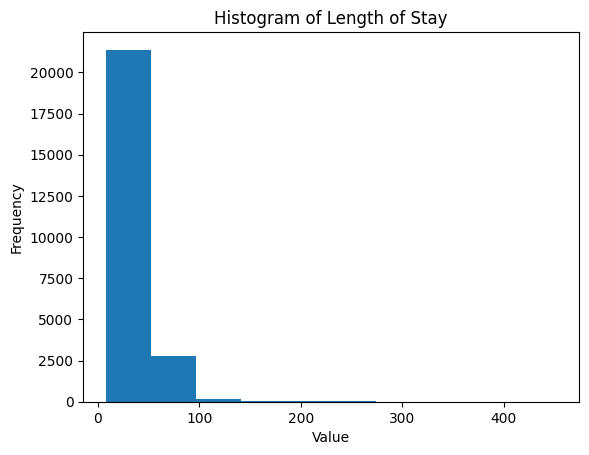

In [14]:
plt.hist(lens_list, bins=10)  # You can change the number of bins
plt.title('Histogram of Length of Stay')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [21]:
# start = time.time()
# list_patients = []
# for patient_id in sepsis_full['pat_id'].unique():
#         # dding .copy() makes curr_pat_df an independent DataFrame, not a view of sepsis_full
#     curr_pat_df = sepsis_full[sepsis_full['pat_id']==patient_id].head(48).copy()
#     len_stay = len(curr_pat_df)
#         # use the .loc[] method to ensure you're working on the original DataFrame.
#     curr_pat_df.loc[:, 'hours2sepsis'] = curr_pat_df['hours2sepsis'].replace(500, 100)
#     curr_pat_df['len_stay'] = len_stay
#         # curr_pat_df['hours2sepsis'] = curr_pat_df['hours2sepsis'].replace(500,  len_stay)
#     list_patients.append(curr_pat_df)
# concatenated_df = pd.concat(list_patients)
# concatenated_df.to_csv('fully_imputed_relabelled_100.csv', index= False)
# print(f'@*%$$$$$    time: {time.time()-start}')